In [1]:
# !pip install xgboost

### Initialization

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [7]:
target = 'DC201'

### Read the data

In [2]:
df = pd.read_csv('preprocessed_datasets/dropped_nan.csv')

In [3]:
df.head()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,1.0
1,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,1.0
2,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,1.0
3,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,1.0
4,11,2,16.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,3.0,1,12.0,12.0,1.0


### one hot encoding tidak perlu karena dataset numeric semua

## **Clean the data**

### drop all NaNs

In [28]:
# df = df.dropna().reset_index(drop=True)
# df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## **Preprocess**

In [8]:
features = [x for x in df.columns if x not in target] ## Removing our target variable

In [9]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df[target], train_size = 0.8, random_state = RANDOM_STATE)

# We will keep the shuffle = True since our dataset has not any time dependency.

In [10]:
print(f'train samples: {len(X_train)} \ validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 15067 \ validation samples: 3767
target proportion: 0.8821


In [11]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

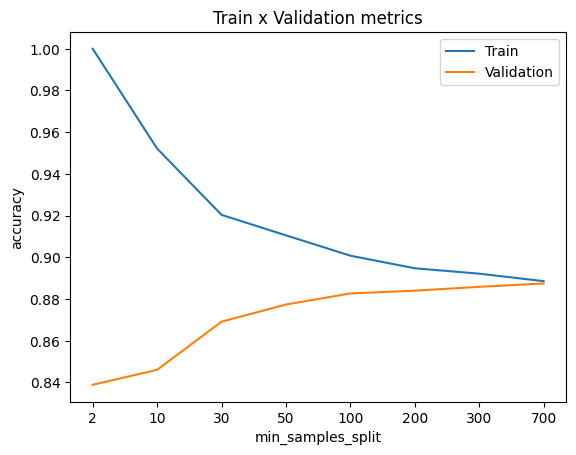

In [12]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

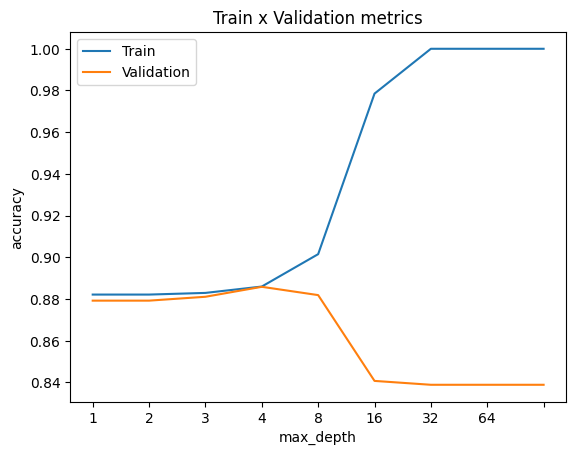

In [13]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [14]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [15]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8829
Metrics validation:
	Accuracy score: 0.8811


# **XGBoost**

In [16]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [17]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [18]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.63064
[1]	validation_0-logloss:0.57937
[2]	validation_0-logloss:0.53687
[3]	validation_0-logloss:0.50143
[4]	validation_0-logloss:0.47085
[5]	validation_0-logloss:0.44439
[6]	validation_0-logloss:0.42170
[7]	validation_0-logloss:0.40245
[8]	validation_0-logloss:0.38569
[9]	validation_0-logloss:0.37112
[10]	validation_0-logloss:0.35806


/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-logloss:0.34709
[12]	validation_0-logloss:0.33739
[13]	validation_0-logloss:0.32864
[14]	validation_0-logloss:0.32125
[15]	validation_0-logloss:0.31427
[16]	validation_0-logloss:0.30836
[17]	validation_0-logloss:0.30314
[18]	validation_0-logloss:0.29881
[19]	validation_0-logloss:0.29478
[20]	validation_0-logloss:0.29075
[21]	validation_0-logloss:0.28783
[22]	validation_0-logloss:0.28450
[23]	validation_0-logloss:0.28223
[24]	validation_0-logloss:0.27970
[25]	validation_0-logloss:0.27787
[26]	validation_0-logloss:0.27592
[27]	validation_0-logloss:0.27428
[28]	validation_0-logloss:0.27254
[29]	validation_0-logloss:0.27064
[30]	validation_0-logloss:0.26925
[31]	validation_0-logloss:0.26797
[32]	validation_0-logloss:0.26722
[33]	validation_0-logloss:0.26633
[34]	validation_0-logloss:0.26542
[35]	validation_0-logloss:0.26430
[36]	validation_0-logloss:0.26361
[37]	validation_0-logloss:0.26329
[38]	validation_0-logloss:0.26245
[39]	validation_0-logloss:0.26178
[40]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=55, ...)

In [19]:
xgb_model.best_iteration

104

In [20]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9225
Metrics test:
	Accuracy score: 0.8938


In [22]:
from sklearn.metrics import classification_report

predictions = xgb_model.predict(X_val)
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.23      0.34       455
         1.0       0.90      0.99      0.94      3312

    accuracy                           0.89      3767
   macro avg       0.79      0.61      0.64      3767
weighted avg       0.88      0.89      0.87      3767

